In [ ]:
from __init__ import *

INFO 07-19 00:46:52 [__init__.py:244] Automatically detected platform cuda.


In [ ]:
llm = LLM(
    model='skt/A.X-4.0-Light',
    dtype="bfloat16",     # 또는 "float16", "auto"
    trust_remote_code=True,
    max_model_len=1024,   # 최대 입력 길이
    gpu_memory_utilization=0.9,  # GPU 메모리 사용률
)

# Sampling 파라미터 설정 (모델 로드 여부와 상관없이 준비)
sampling_params = SamplingParams(
    max_tokens=2048,
    temperature=1.2,
    top_p=0.95,
    min_p=0.1,
    top_k=-1,
    n=8
)

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

INFO 07-19 00:47:04 [config.py:841] This model supports multiple tasks: {'embed', 'generate', 'reward', 'classify'}. Defaulting to 'generate'.
INFO 07-19 00:47:04 [config.py:1472] Using max model len 1024
INFO 07-19 00:47:04 [config.py:2285] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

INFO 07-19 00:47:06 [core.py:526] Waiting for init message from front-end.
INFO 07-19 00:47:06 [core.py:69] Initializing a V1 LLM engine (v0.9.2) with config: model='skt/A.X-4.0-Light', speculative_config=None, tokenizer='skt/A.X-4.0-Light', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityConfig(show_hidden_metrics_for_version=None, otlp_traces_endpoint=None, collect_detailed_traces=None), seed=0, served_model_name=skt/A.X-4.0-Light, num_scheduler_steps=1, 

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.60G [00:00<?, ?B/s]

INFO 07-19 00:47:24 [weight_utils.py:308] Time spent downloading weights for skt/A.X-4.0-Light: 16.135185 seconds


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


INFO 07-19 00:47:27 [default_loader.py:272] Loading weights took 2.63 seconds
INFO 07-19 00:47:28 [gpu_model_runner.py:1801] Model loading took 13.5808 GiB and 19.470765 seconds
INFO 07-19 00:47:35 [backends.py:508] Using cache directory: /root/.cache/vllm/torch_compile_cache/defd030538/rank_0_0/backbone for vLLM's torch.compile
INFO 07-19 00:47:35 [backends.py:519] Dynamo bytecode transform time: 6.70 s
INFO 07-19 00:47:38 [backends.py:181] Cache the graph of shape None for later use


[rank0]:W0719 00:47:39.287000 7683 torch/_inductor/utils.py:1250] [0/0] Not enough SMs to use max_autotune_gemm mode


INFO 07-19 00:48:01 [backends.py:193] Compiling a graph for general shape takes 26.47 s
INFO 07-19 00:48:12 [monitor.py:34] torch.compile takes 33.17 s in total
INFO 07-19 00:48:13 [gpu_worker.py:232] Available KV cache memory: 6.57 GiB
INFO 07-19 00:48:13 [kv_cache_utils.py:716] GPU KV cache size: 123,088 tokens
INFO 07-19 00:48:13 [kv_cache_utils.py:720] Maximum concurrency for 1,024 tokens per request: 120.20x


Capturing CUDA graph shapes: 100%|██████████| 67/67 [00:28<00:00,  2.37it/s]


INFO 07-19 00:48:42 [gpu_model_runner.py:2326] Graph capturing finished in 28 secs, took 0.49 GiB
INFO 07-19 00:48:42 [core.py:172] init engine (profile, create kv cache, warmup model) took 74.21 seconds


In [ ]:
# system_prompt="""당신은 한국의 문화와 관련된 문제를 전문적으로 풀이해주는 문제 해설가입니다.  
# 사용자가 입력한 문제에 대해 정확하고 친절하게 **문제 해설**과 **정답**을 제시하세요.  
# 답변 형식은 반드시 다음과 같이 작성하세요:  
# 문제 해설: ...  
# 정답: ..."""

system_prompt = """당신은 한국의 문화와 관련된 문제를 전문적으로 풀이해주는 문제 해설가입니다.  
사용자가 입력한 문제에 대해 정확하고 친절하게 **문제 해설**과 **정답**을 제시하세요.  
답변 형식은 반드시 다음과 같이 작성하세요:  
문제 해설: ...  
정답: ...

※ 정답 작성 형식 안내  
- 선다형 문제일 경우: **정답 번호만** 작성하세요.  
- 단답형 문제일 경우:  
    - 정답이 1개인 경우: 괄호, 한자 없이 **한글** 또는 **영어**를 사용하세요. (예: 사과 또는 apple)  
    - 정답이 여러 개인 경우: 쉼표(,)로 구분해 나열하세요. (예: 사과, 배)  
    - 순서 배열 문제인 경우: '-'로 구분해 정확한 순서를 유지해 나열하세요. (예: ㄱ-ㄴ-ㄷ-ㄹ)"""


user_prompt="아래 문제를 해설해주고 정답을 알려줘.\n반드시 문제 해설 다음에 정답을 작성해줘.\n\n카테고리: {category}\n도메인: {domain}\n키워드: {topic_keyword}\n문제 유형: {question_type}\n\n문제: {question}\n\n답변:"

선다형 정답 작성 형식
- 정답 번호 작성


단답형 정답 작성 형식
- 하나의 질문에 대해 정답이 1개 존재하는 경우 : 허용되는 단어 : 한글, 영어, () 없음, 한자 없음
    - 예) 사과 (괄호나 한자 사용 금지)
- 하나의 질문에 대해 정답이 2개 이상 존재하는 경우 : ‘,’기준 나열
    - 예) 사과, 배
- 순서에 맞게 배열하세요 : ‘-’ 기준으로 나열
    - 예) ㄱ-ㄴ-ㄷ-ㄹ

In [3]:
training_df = pd.read_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형.csv')
training_df

,category,domain,question_type,topic_keyword,question,answer
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4
2,문화 지식,과학기술,선다형,우주인,힌국인 최초의 우주 비행사는 누구인가요? \n 1. 조니 김 2. 이소연 ...,2
3,문화 지식,일상생활,선다형,돌잔치,돌잔치와 관련 없는 것을 고르세요. \n 1. 돌잡이 2. 돌상 3. 돌옷 ...,4
4,문화 지식,풍습/문화유산,단답형,금줄,한국의 금줄은 무엇을 막기 위해 문이나 길 어귀에 건너질러 매나요?,부정
...,...,...,...,...,...,...
451,문화 관점,가치관,단답형,이사 미신,러시아에서는 이사한 집에 고양이가 드나들면 복이 온다고 합니다. 한국에서는 복을 위...,밥솥
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2
453,문화 지식,역사,선다형,고려시대사,다음 중 고려시대의 사건이 아닌 것은 무엇인가요? \n 1.이자겸의 난 2.저고여 ...,4
454,문화 실행,지리,단답형,기후동행카드,기후동행카드를 실물로 사용하기 위한 방법을 순서에 맞게 배열하세요. 배열 시 각 기...,ㄷ-ㄴ-ㄹ-ㄱ#ㄷ - ㄴ - ㄹ - ㄱ


In [ ]:
results = []
for idx, row in training_df.iterrows():
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt.format(
            category=row['category'],
            domain=row['domain'],
            topic_keyword=row['topic_keyword'],
            question_type=row['question_type'],
            question=row['question']
        )}
    ]

    # 생성
    outputs = llm.chat(
        messages=messages,
        sampling_params=sampling_params,
    )
    answers = []
    for i, output in enumerate(outputs[0].outputs):
        generated_text = output.text.strip()
        print(f"Generated answer {i+1} for question {idx}: {generated_text}")
        answers.append(generated_text)
    # 결과 저장
    results.append([idx]+ answers)

In [ ]:
results_df = pd.DataFrame(results, columns=['index'] + [f'answer_{i+1}' for i in range(len(results[0])-1)])
results_df.to_csv('/workspace/korean_culture_QA_2025/data/preprocessed/curriculum_sampling_results.csv', index=False)

# 정답률 확인

In [42]:
import pandas as pd

In [43]:
training_df = pd.read_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형.csv')
training_df

,category,domain,question_type,topic_keyword,question,answer
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4
2,문화 지식,과학기술,선다형,우주인,힌국인 최초의 우주 비행사는 누구인가요? \n 1. 조니 김 2. 이소연 ...,2
3,문화 지식,일상생활,선다형,돌잔치,돌잔치와 관련 없는 것을 고르세요. \n 1. 돌잡이 2. 돌상 3. 돌옷 ...,4
4,문화 지식,풍습/문화유산,단답형,금줄,한국의 금줄은 무엇을 막기 위해 문이나 길 어귀에 건너질러 매나요?,부정
...,...,...,...,...,...,...
451,문화 관점,가치관,단답형,이사 미신,러시아에서는 이사한 집에 고양이가 드나들면 복이 온다고 합니다. 한국에서는 복을 위...,밥솥
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2
453,문화 지식,역사,선다형,고려시대사,다음 중 고려시대의 사건이 아닌 것은 무엇인가요? \n 1.이자겸의 난 2.저고여 ...,4
454,문화 실행,지리,단답형,기후동행카드,기후동행카드를 실물로 사용하기 위한 방법을 순서에 맞게 배열하세요. 배열 시 각 기...,ㄷ-ㄴ-ㄹ-ㄱ#ㄷ - ㄴ - ㄹ - ㄱ


In [44]:
answers_df = pd.read_csv('/workspace/korean_culture_QA_2025/data/preprocessed/curriculum_sampling_results.csv')
answers_df

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/korean_culture_QA_2025/data/preprocessed/curriculum_sampling_results.csv'

In [45]:
df = pd.concat([training_df, answers_df], axis=1)
df

,category,domain,question_type,topic_keyword,question,answer,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3,0,문제 해설: 이 문제는 한국 전통 놀이 중 조선시대에 행해진 것을 찾는 문제입니다....,문제 해설: 이 문제는 조선시대에 행해진 한국의 전통 놀이를 묻고 있습니다. 각 선...,문제 해설: 이 문제는 조선시대 한국에서 행해진 전통 놀이에 관한 것입니다. 각 선...,문제 해설: 이 문제는 조선시대에 행해졌던 한국의 전통 놀이에 관한 지식을 묻고 있...,문제 해설:\n이 문제는 조선시대 동안 행해졌던 한국의 전통 놀이에 대한 지식을 묻...,"문제 해설:\n한국의 전통 놀이는 시대에 따라 다양한 형태로 발전했으며, 조선시대에...",문제 해설:\n한국의 전통 놀이 중 조선시대에 행해진 것들을 식별하는 문제입니다. ...,문제 해설: 이 문제는 한국의 전통 놀이 중 조선시대에 행해진 놀이 하나를 찾는 문...
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4,1,"문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 주로 전라남도 진도 지역...","문제 해설: 진도아리랑은 한국의 전통적인 민요로, 주로 전라남도 진도 지역에서 불려...","문제 해설: 진도아리랑은 전라남도 진도에서 유래된 전통 민요로, 그 형식과 내용에 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요로, 주로 전라도 지역에서 전해집니다....","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 주로 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 주로 전라도 진도 지역에...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 주로 ...","문제 해설: 진도아리랑은 전라남도 진도에서 유래된 전통 민요로, 한국의 대표적인 서..."
2,문화 지식,과학기술,선다형,우주인,힌국인 최초의 우주 비행사는 누구인가요? \n 1. 조니 김 2. 이소연 ...,2,2,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 한국 최초의 우주...,문제 해설: 이 문제는 한국 최초의 우주 비행사에 대한 지식을 묻고 있습니다. 20...,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 2008년 4월 ...,문제 해설: 이 문제는 한국인 최초의 우주 비행사를 묻고 있습니다. 한국의 우주 개...,문제 해설: 이 문제는 한국의 최초 우주 비행사를 묻고 있습니다. 한국은 2008년...,문제 해설: 이 문제는 한국의 과학기술 분야에서 중요한 사건 중 하나인 최초의 한국...,문제 해설: 이 문제는 한국에서 최초로 우주로 비행한 인물의 이름을 묻고 있습니다....,문제 해설: 이 문제는 한국에서 최초로 우주 비행을 한 사람의 이름을 묻고 있습니다...
3,문화 지식,일상생활,선다형,돌잔치,돌잔치와 관련 없는 것을 고르세요. \n 1. 돌잡이 2. 돌상 3. 돌옷 ...,4,3,문제 해설:\n돌잔치란 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통적인...,문제 해설: 돌잔치는 아이가 태어난 지 1년이 되는 날을 기념하는 한국의 전통 의식...,문제 해설: 돌잔치는 한국에서 아기가 태어난 지 1년이 되는 날에 행하는 전통 행사...,"문제 해설:\n 돌잔치는 아기가 첫 생일을 맞이하는 행사로, 전통적으로 아기의 건강...",문제 해설: 돌잔치는 한국에서 아기의 첫 번째 생일인 1년을 기념하는 중요한 전통 ...,"문제 해설: 돌잔치는 아기가 첫 번째 생일을 맞는 날로, 한국의 전통적인 행사 중 ...","문제 해설:\n 돌잔치는 아이의 첫 번째 생일을 축하하는 한국의 전통 문화로, 다양...",문제 해설: 돌잔치는 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통적인 ...
4,문화 지식,풍습/문화유산,단답형,금줄,한국의 금줄은 무엇을 막기 위해 문이나 길 어귀에 건너질러 매나요?,부정,4,문제 해설: 한국의 금줄은 전통적으로 집이나 마을 입구에 설치하여 부정한 기운이나 ...,문제 해설: 한국의 금줄은 전통적으로 부정한 기운이나 악귀가 집안으로 들어오는 것을...,"문제 해설: 금줄은 전통 한국의 풍습 중 하나로, 주로 액운이나 나쁜 기운을 막기 ...",문제 해설: 금줄은 한국의 전통 풍습에서 주로 집이나 마을에 나쁜 기운이나 불운이 ...,"문제 해설: 금줄은 전통적으로 한국의 민속 신앙에서 사용되며, 부정한 기운이나 악귀...","문제 해설: 한국의 금줄은 전통적으로 부정한 기운이나 악령, 잡귀 등을 막기 위해 ...","문제 해설: 한국의 금줄은 전통적으로 집이나 건물의 문, 또는 길 어귀에 걸쳐놓아 ...",문제 해설: 한국의 금줄은 주로 나쁜 기운이나 액운을 막기 위해 문이나 길 어귀에 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,문화 관점,가치관,단답형,이사 미신,러시아에서는 이사한 집에 고양이가 드나들면 복이 온다고 합니다. 한국에서는 복을 위...,밥솥,451,문제 해설: 이 문제는 러시아와 한국의 문화적 가치관 차이를 다루고 있습니다. 러시...,"문제 해설: 이 문제는 한국과 러시아 간의 문화적 차이, 특히 '이사'와 관련된 미...",문제 해설: 이 문제는 서로 다른 문화권에서 이사와 관련된 미신이나 전통에 대해 묻...,문제 해설: 이 문제는 서로 다른 문화권의 '이사 미신'에 관한 가치관 차이를 묻고...,문제 해설: 이 문제는 한국과 러시아 간의 문화적 차이를 다루고 있습니다. 러시아에...,문제 해설: 이 문제는 한국과 러시아 두 나라의 문화적 차이에 대한 이해를 묻고 있...,문제 해설: 이 문제는 한국과 러시아 문화 간의 가치관 차이를 다루고 있습니다. 한...,문제 해설: 이 문제는 서로 다른 문화권의 복과 관련된 미신이나 관습을 묻고 있습니...
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2,452,문제 해설:\n병인양요는 1866년(고종 3년) 프랑스군이 조선의 강화도를 침략한 ...,문제 해설: 흥선대원군의 천주교 탄압은 1867년(고종 4년)에 시작되어 많은 천주...,문제 해설: 이 문제는 한국 역사에서 흥선대원군의 천주교 탄압과 관련된 사건을 묻고...,문제 해설: 이 문제는 한국의 역사에서 외세의 침략과 관련된 사건을 묻고 있습니다....,문제 해설: 이 문제는 조선 시대 역사 중 특정 사건에 관한 것입니다. 병인양요는 ...,"문제 해설:\n이 문제는 한국의 역사, 특히 19세기 중반 발생한 외세 침입에 관한...","문제 해설: 흥선대원군의 천주교 탄압은 1868년(갑자년)에 시작되어, 프랑스 선교...","문제 해설: 병인양요는 1866년에 발생한 프랑스와의 무력 충돌로, 흥선대원군이 천..."
453,문화 지식,역사,선다형,고려시대사,다음 중 고려시대의 사건이 아닌 것은 무엇인가요? \n 1.이자겸의 난 2.저고여 ...,4,453,"문제 해설: 이 문제는 고려시대의 역사적 사건들을 구분하고, 그 중 고려시대에 일어...","문제 해설:\n고려시대의 주요 사건들을 살펴보면, 1. 이자겸의 난은 11세기 말에...",문제 해설: 이 문제는 고려시대의 역사적 사건들 중에서 실제로 발생하지 않은 사건을...,문제 해설:\n이 문제는 고려시대의 역사적 사건들 중에서 실제 일어나지 않은 사건을...,문제 해설: 고려시대 주요 사건들 중 '왕자의 난'은 조선시대에 발생한 사건입니다....,문제 해설: 이 문제는 고려시대의 역사적 사건들 중 실제로 고려시대에 발생하지 않은...,문제 해설: 이 문제는 고려시대의 역사적 사건들 중 실제로 발생하지 않았거나 다른 ...,문제 해설

In [1]:
import re

In [2]:
def evaluate_short_answer(pred_answer, true_answer):

    """
    Calculate Exact Match score where true_data may contain multiple acceptable answers separated by #
    """
    correct = 0
    true_answer_list = true_answer.split('#')

    if any(pred_answer == ans for ans in true_answer_list):
        correct = 1
            
    return correct

In [3]:
def evaluate_multiple_choice(pred_answer, true_answer):
    """선다형 평가"""
    # 숫자 추출
    # pred_nums = re.findall(r'\b[1-5]\b', pred_answer)
    pred_nums = re.findall(r'[1-5]', pred_answer)
    if pred_nums:
        pred = pred_nums[0]
    else:
        pred = pred_answer.strip()
    
    return 1 if pred == true_answer else 0

In [49]:
n = 8
accs = []
for idx, row in df.iterrows():
    sum_score = 0
    if row['question_type'] == "선다형":
        for i in range(1, n+1):
            pred_answer = row[f'answer_{i}'].split('정답:')[-1].strip()
            # pred_answer = pred_answer.replace('*', '').replace('</answer>','')
            score = evaluate_multiple_choice(pred_answer, row['answer'])
            sum_score += score

    elif row['question_type'] == "단답형":
        for i in range(1, n+1):
            pred_answer = row[f'answer_{i}'].split('정답:')[-1].strip()
            score = evaluate_short_answer(pred_answer, row['answer'])
            sum_score += score
    acc = sum_score/n
    accs.append(acc)
df['accuracy'] = accs

In [50]:
df[df['question_type'] == '선다형']['accuracy'].describe()

count    307.000000
mean       0.837134
std        0.304416
min        0.000000
25%        0.875000
50%        1.000000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

<Axes: >

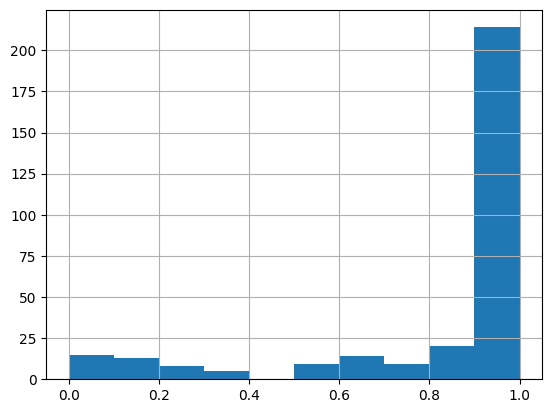

In [51]:
df[df['question_type'] == '선다형']['accuracy'].hist()

In [52]:
df[df['question_type'] == '단답형']['accuracy'].describe()

count    149.000000
mean       0.616611
std        0.429011
min        0.000000
25%        0.125000
50%        0.875000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

<Axes: >

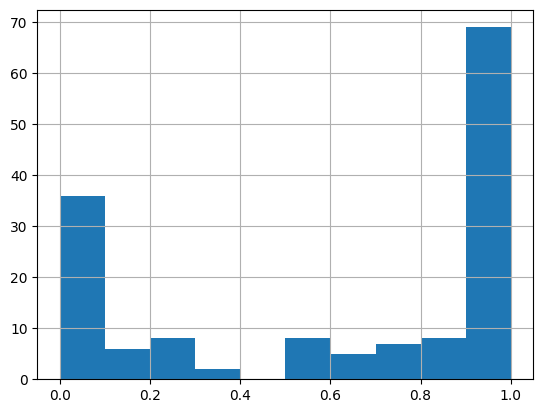

In [53]:
df[df['question_type'] == '단답형']['accuracy'].hist()

In [54]:
df['accuracy'].describe()

count    456.000000
mean       0.765077
std        0.364570
min        0.000000
25%        0.625000
50%        1.000000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

<Axes: >

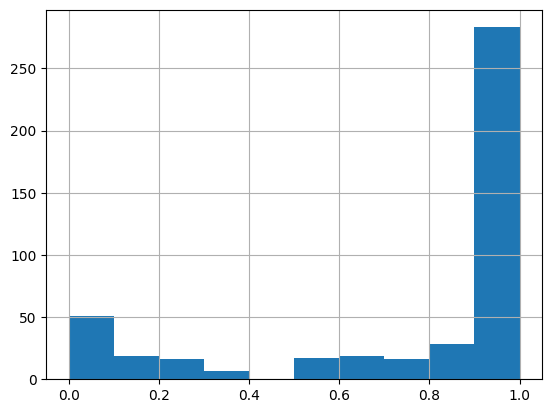

In [55]:
df['accuracy'].hist()

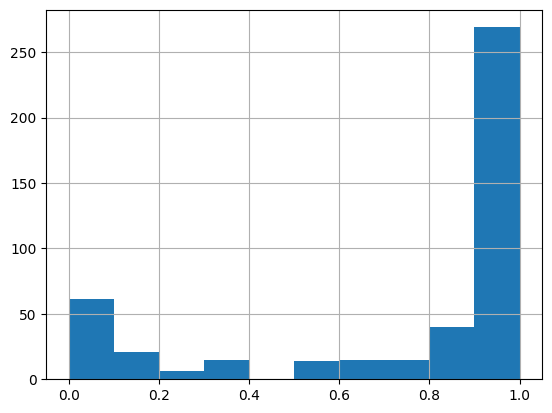

In [37]:
curri_df = df[(df['accuracy'] != 0) & (df['accuracy'] != 1)]
curri_df

,category,domain,question_type,topic_keyword,question,answer,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,accuracy
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3,0,문제 해설: 이 문제는 한국 전통 놀이 중 조선시대에 행해진 것을 찾는 문제입니다....,문제 해설: 이 문제는 조선시대에 행해진 한국의 전통 놀이를 묻고 있습니다. 각 선...,문제 해설: 이 문제는 조선시대 한국에서 행해진 전통 놀이에 관한 것입니다. 각 선...,문제 해설: 이 문제는 조선시대에 행해졌던 한국의 전통 놀이에 관한 지식을 묻고 있...,문제 해설:\n이 문제는 조선시대 동안 행해졌던 한국의 전통 놀이에 대한 지식을 묻...,"문제 해설:\n한국의 전통 놀이는 시대에 따라 다양한 형태로 발전했으며, 조선시대에...",문제 해설:\n한국의 전통 놀이 중 조선시대에 행해진 것들을 식별하는 문제입니다. ...,문제 해설: 이 문제는 한국의 전통 놀이 중 조선시대에 행해진 놀이 하나를 찾는 문...,0.875
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4,1,"문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 주로 전라남도 진도 지역...","문제 해설: 진도아리랑은 한국의 전통적인 민요로, 주로 전라남도 진도 지역에서 불려...","문제 해설: 진도아리랑은 전라남도 진도에서 유래된 전통 민요로, 그 형식과 내용에 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요로, 주로 전라도 지역에서 전해집니다....","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 주로 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 주로 전라도 진도 지역에...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 주로 ...","문제 해설: 진도아리랑은 전라남도 진도에서 유래된 전통 민요로, 한국의 대표적인 서...",0.250
15,문화 관점,가치관,선다형,민속 신앙(불길한 행동),일본에서는 젓가락을 세워서 밥에 꽂는 것을 불길하고 무례하다고 생각합니다. 한국에서...,1,15,문제 해설: 이 문제는 한국과 일본의 민속 신앙에 관한 문화적 차이를 묻고 있습니다...,문제 해설: 이 문제는 한국과 일본의 민속 신앙에 관련된 가치관 차이를 묻고 있습니...,문제 해설: 이 문제는 일본과 한국의 민속 신앙 및 문화적 가치관의 차이를 묻고 있...,문제 해설:\n이 문제는 한국과 일본의 문화적 차이에 대해 묻고 있습니다. 일본에서...,문제 해설: 이 문제는 한국과 일본의 민속 신앙과 관련된 가치관 차이를 묻고 있습니...,"문제 해설: 이 문제는 한국과 일본의 문화적 차이를 묻고 있습니다. 특히, 두 나라...",문제 해설:\n이 문제는 일본과 한국의 문화적 가치관 차이를 묻고 있습니다. 일본에...,"문제 해설: 이 문제는 한국과 일본의 문화적 차이, 특히 민속 신앙과 관련된 가치관...",0.625
16,문화 지식,지리,선다형,교통수단 이용,일반인이 배에 승선하기 위해 필요한 자료가 아닌 것을 고르세요. \n 1. 승선 신...,4,16,문제 해설: 이 문제는 일반인이 배에 승선하기 위해 필요한 자료에 대한 지식을 묻고...,문제 해설:\n이 문제는 일반인이 배에 승선하기 위해 필요한 자료들에 대해 묻고 있...,문제 해설: 이 문제는 일반인(승객)이 배에 탑승하기 위해 필요한 자료에 관한 것입...,문제 해설: 이 문제는 일반인이 배를 타고 승선할 때 필요한 서류나 자료에 관한 것...,문제 해설: 이 문제는 일반인이 배를 이용하기 위해 필요한 자료들 중 불필요한 것을...,문제 해설: 이 문제는 일반인이 배에 승선하기 위해 필요한 자료에 대한 지식을 묻고...,문제 해설: 이 문제는 일반인이 배에 승선하기 위해 필요한 자료 중 해당되지 않는 ...,문제 해설:\n이 문제는 일반인(관광객이나 승객)이 배에 탑승하기 위해 필요한 서류...,0.125
17,문화 관점,가치관,선다형,윤달 미신,대만에서는 윤달동안 딸 부모 건강에 이상이 올 수 있다는 미신 때문에 결혼한 딸이 ...,4,17,문제 해설:\n대만에서는 윤달 동안 딸의 건강이 악화될 수 있다는 미신 때문에 결혼...,문제 해설: 이 문제는 윤달과 관련된 한국의 미신 또는 풍습에 대해 묻고 있습니다....,문제 해설: 이 문제는 한국의 윤달과 관련된 미신들에 대해 묻고 있습니다. 윤달은 ...,문제 해설: 이 문제는 대만의 윤달 관련 미신과 한국의 윤달 미신에 대한 지식을 묻...,문제 해설: 이 문제는 윤달과 관련된 한국의 미신 중 하나를 묻고 있습니다. 윤달은...,"문제 해설:\n윤달은 한국 전통 문화에서 특별한 의미를 가지며, 주로 '부정'이나 ...","문제 해설: 이 문제는 한국과 대만의 문화적 차이에 관한 것으로, 특히 윤달과 관련...",문제 해설: 이 문제는 윤달과 관련된 한국의 미신 중 어떤 것이 존재하는지를 묻고 ...,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,문화 지식,역사,선다형,새마을운동,새마을운동의 41주년을 맞아 새마을의 날이 국가 기념일로 제정된 날짜는 언제인가요?...,2,441,문제 해설: 새마을운동은 1970년 4월 22일 박정희 대통령 주도로 시작된 한국의...,"문제 해설:\n새마을운동은 1970년에 시작된 대한민국의 농촌 부흥 운동으로, 박정...","문제 해설: 새마을운동은 1970년 시작된 한국의 농촌 부흥 운동으로, 41주년을 ...","문제 해설: 새마을운동은 1970년 시작된 한국의 농촌 부흥 운동으로, 1971년에...","문제 해설: 새마을운동은 1970년 4월 22일, 박정희 대통령에 의해 시작된 농촌...","문제 해설:\n새마을운동은 1970년에 시작된 한국의 농촌 개발 운동으로, 박정희 ...","문제 해설: 새마을운동은 1970년대 한국의 농촌 개발 운동으로, 박정희 정부 시절...",문제 해설:\n새마을운동은 1970년에 시작된 한국의 농촌 개발 및 경제 발전 운동...,0.500
442,문화 실행,지리,선다형,지하철 환승 노선,다음 중 서울 지하철로 신도림역에서 3호선으로 환승할 때 이용할 수 있는 역은 어디...,4,442,문제 해설: 이 문제는 서울의 지하철 노선 중에서 신도림역에서 3호선으로 환승할 수...,문제 해설: 신도림역에서 3호선으로 환승하기 위해 가장 효율적으로 접근할 수 있는 ...,"문제 해설:\n서울 지하철 3호선은 주요 교통축을 이루는 노선으로, 신도림역에서 3...",문제 해설:\n서울 지하철 2호선 신도림역에서 3호선으로 환승하기 위한 경로를 묻는...,문제 해설: 이 문제는 서울 지하철 시스템에서 신도림역에서 3호선으로 환승할 때 이...,문제 해설: 신도림역에서 3호선으로 환승하기 위해서는 1호선과 3호선이 교차하는 역...,문제 해설: 이 문제는 서울 지하철 2호선과 3호선 간의 환승 노선을 묻고 있습니다...,문제 해설: 이 문제는 서울 지하철에서 신도림역에서 3호선으로 환승할 수 있는 역을...,0.875
449,문화 실행,일상생활,선다형,된장찌개,된장찌개를 만드는 순서 중 맞는 것을 고르시오. \n 1. 된장을 먼저 냄비에 ...,2,449,문제 해설: 된장찌개를 만드는 일반적인 순서는 다음과 같습니다. 먼저 물에 된장을 ...,문제 해설: 된장찌개를 만들 때 올바른 순서는 일반적으로 다음과 같습니다. 먼저 재...,문제 해설: 이 문제는 된장찌개를 만드는 올바른 순서를 묻고 있습니다. 된장찌개는 ...,문제 해설: 된장찌개를 만드는 일반적인 순서는 된장을 물에 풀어 끓이는 것이 기본입...,"문제 해설: 된장찌개는 일반적으로 된장을 먼저 물에 풀어 끓인 후, 재료를 넣고 간...","문제 해설: 된장찌개는 

In [ ]:
curri_df_v2 = df[(df['accuracy'] != 1)]

<Axes: >

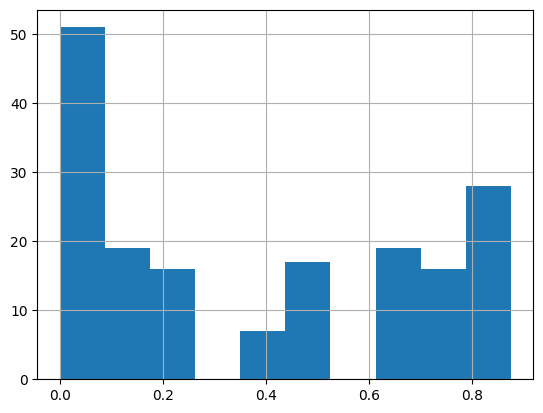

In [57]:
curri_df_v2['accuracy'].hist()

In [58]:
curri_df_v2['question_type'].value_counts()

question_type
선다형    93
단답형    80
Name: count, dtype: int64

In [59]:
curri_df_v2.to_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형_curriculum_v2.csv', index=False)

In [38]:
curri_df['question_type'].value_counts()

question_type
선다형    78
단답형    44
Name: count, dtype: int64

In [39]:
curri_df.to_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형_curriculum.csv', index=False)

---

# 학습 후 분포 확인하기

## 커리큘럼러닝의 경우 난이도 순 배열

In [3]:
from __init__ import *

INFO 07-21 14:01:19 [__init__.py:244] Automatically detected platform cuda.


In [62]:
training_df = pd.read_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형.csv')
training_df

,category,domain,question_type,topic_keyword,question,answer
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4
2,문화 지식,과학기술,선다형,우주인,힌국인 최초의 우주 비행사는 누구인가요? \n 1. 조니 김 2. 이소연 ...,2
3,문화 지식,일상생활,선다형,돌잔치,돌잔치와 관련 없는 것을 고르세요. \n 1. 돌잡이 2. 돌상 3. 돌옷 ...,4
4,문화 지식,풍습/문화유산,단답형,금줄,한국의 금줄은 무엇을 막기 위해 문이나 길 어귀에 건너질러 매나요?,부정
...,...,...,...,...,...,...
451,문화 관점,가치관,단답형,이사 미신,러시아에서는 이사한 집에 고양이가 드나들면 복이 온다고 합니다. 한국에서는 복을 위...,밥솥
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2
453,문화 지식,역사,선다형,고려시대사,다음 중 고려시대의 사건이 아닌 것은 무엇인가요? \n 1.이자겸의 난 2.저고여 ...,4
454,문화 실행,지리,단답형,기후동행카드,기후동행카드를 실물로 사용하기 위한 방법을 순서에 맞게 배열하세요. 배열 시 각 기...,ㄷ-ㄴ-ㄹ-ㄱ#ㄷ - ㄴ - ㄹ - ㄱ


In [63]:
'/workspace/korean_culture_QA_2025/data/preprocessed/curriculum_sampling_results_선다형_단답형_Midm-2.0-Base-Instruct.csv'
answers_df = pd.read_csv('/workspace/korean_culture_QA_2025/data/preprocessed/curriculum_sampling_results_선다형_단답형_v2.csv')
answers_df

,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8
0,0,문제 해설:\n이 문제는 한국의 전통 놀이 중에서 조선시대에 행해진 놀이를 찾는 문...,문제 해설: 이 문제는 한국의 전통 놀이 중에서 조선시대에 행해졌던 것을 찾는 문제...,문제 해설:\n이 문제는 조선시대에 행해졌던 한국의 전통 놀이를 묻고 있습니다. 각...,문제 해설: 이 문제는 한국 전통 놀이 중에서 조선시대에 행해졌던 놀이를 찾는 것입...,문제 해설:\n이 문제는 한국 전통 놀이 중 조선시대에 행해지던 놀이를 찾는 문제입...,문제 해설:\n한국의 전통 놀이 중 '조선시대'에 행해진 놀이를 찾는 문제입니다. ...,문제 해설:\n이 문제는 한국 전통 놀이 중에서 조선시대에 행해졌던 놀이의 종류를 ...,문제 해설:\n이 문제는 한국 전통 놀이 중 조선시대에 행해진 놀이를 찾는 문제입니...
1,1,"문제 해설: 진도아리랑은 전라남도 진도에서 유래된 대표적인 민요로, 주로 노동요의 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 그 형성과 발전에 있어 ...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 전라도 진도 지역에서 전해 내려...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 그 형성과정에 여러 타령이 영향...","문제 해설:\n진도아리랑은 한국의 대표적인 민속 노래 중 하나로, 그 기원과 형성에...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 전라남도 진도 지역에서 전승되어...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 전해 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요로, 그 기원과 형성에 있어 여러 타령..."
2,2,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 한국의 우주 탐사...,문제 해설: 이 문제는 한국인의 최초의 우주 비행사에 관한 지식을 묻고 있습니다. ...,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 한국 최초의 우주...,문제 해설: 이 문제는 한국인의 최초 우주 비행사에 대한 지식을 묻고 있습니다. 2...,문제 해설: 이 문제는 한국의 과학기술 분야에서 중요한 인물 중 하나인 최초의 한국...,문제 해설: 한국 최초의 우주인(우주 비행사)은 2008년 4월 8일 소유스 우주선...,"문제 해설: 이 문제는 한국인의 최초의 우주 비행사를 묻고 있습니다. 2008년, ...",문제 해설: 한국 최초의 우주 비행사는 2008년 4월 8일 러시아의 소유즈 우주선...
3,3,"문제 해설:\n돌잔치란 한국에서 아기가 첫 번째 생일을 맞는 날에 가족과 친지, 지...","문제 해설:\n 돌잔치는 아기가 태어난 지 1년이 되는 날에 여는 축하 행사로, 한...","문제 해설:\n 돌잔치는 한국에서 아기가 첫 돌을 맞이하는 중요한 축하 행사로, 전...","문제 해설:\n돌잔치란 한국 전통에서 아기가 첫 생일을 맞이하는 축하 의식으로, 아...",문제 해설:\n 돌잔치는 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통 ...,문제 해설:\n돌잔치란 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통적인...,문제 해설: 돌잔치란 아이가 태어난 지 1년이 되는 날을 기념하는 한국의 전통 축하...,문제 해설:\n 돌잔치는 아이가 태어난 지 첫돌(1년)을 기념하는 한국 전통 행사로...
4,4,"문제 해설: 금줄은 한국의 전통 풍습 중 하나로, 주로 출산, 장례, 명절 등의 중...",문제 해설:\n금줄은 전통적으로 한국의 풍습과 문화에서 중요한 역할을 하는 상징물로...,"문제 해설: 금줄은 전통적으로 한국에서 출산이나 혼례, 장례식 등 중요한 행사나 집...",문제 해설:\n한국의 금줄은 전통적으로 출산이나 혼례 등 중요한 의식이나 행사에서 ...,문제 해설: 금줄은 전통 한국 문화에서 중요한 역할을 하는 상징적 장치입니다. 주로...,"문제 해설: 한국의 금줄은 전통적으로 부정한 기운이나 악령, 나쁜 기운이 집안으로 ...","문제 해설:\n금줄은 한국의 전통 풍습에서 중요한 역할을 하는 것으로, 주로 집이나...","문제 해설: 금줄은 한국의 전통적인 풍습 중 하나로, 주로 집이나 사찰, 또는 길 ..."
...,...,...,...,...,...,...,...,...,...
451,451,문제 해설:\n이 문제는 서로 다른 문화권에서 '이사'와 관련된 미신 또는 전통에 ...,문제 해설:\n이 문제는 두 문화권에서 이사 후 복을 가져다주는 관습에 대해 묻고 ...,문제 해설: 이 문제는 한국과 러시아의 문화적 가치관 차이를 묻고 있습니다. 러시아...,문제 해설: 이 문제는 한국과 러시아 사이의 문화적 가치관 차이를 묻고 있습니다. ...,문제 해설:\n이 문제는 러시아와 한국의 문화적 차이에 대한 이해를 묻고 있습니다....,문제 해설: 이 문제는 러시아와 한국의 문화적 차이에 관한 가치관을 묻고 있습니다....,문제 해설:\n이 문제는 서로 다른 문화권에서 '복'을 불러오는 풍습에 관한 것입니...,문제 해설:\n이 문제는 한국과 러시아 간의 문화적 차이를 묻는 문제입니다. 러시아...
452,452,문제 해설: 이 문제는 19세기 중반 한국의 역사적 사건 중 하나를 묻고 있습니다....,"문제 해설: 이 문제는 한국 역사에서 특정 사건을 묻고 있습니다. 19세기 후반, ...",문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건입니다. 이 사건은 프...,문제 해설: 이 문제는 조선 역사에서 흥선대원군 시기의 천주교 탄압과 관련된 사건을...,문제 해설:\n병인양요는 1866년(고종 3년) 프랑스군이 흥선대원군의 천주교 탄압...,"문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건으로, 조선에서 천주교...",문제 해설: 이 문제는 한국 역사에서 프랑스군이 강화도(인화문)에 침입한 사건에 대...,문제 해설:\n이 문제는 한국 역사에서 중요한 사건 중 하나인 '병인양요'에 관한 ...
453,453,문제 해설:\n이 문제는 고려시대의 주요 사건들 중 실제 발생하지 않았거나 고려시대...,문제 해설:\n이 문제는 고려시대의 주요 역사적 사건들 중에서 실제 발생하지 않았거...,문제 해설: 이 문제는 고려시대의 역사적 사건들 중에서 실제 발생하지 않았거나 고려...,문제 해설: 이 문제는 고려시대의 역사적 사건들 중 실제 고려시대에 발생하지 않은 ...,문제 해설:\n이 문제는 고려시대의 역사적 사건들을 식별하는 능력을 테스트합니다. ...,문제 해설:\n이 문제는 고려시대의 역사적 사건 중 해당되지 않는 것을 찾는 문제입...,문제 해설: 이 문제는 고려시대의 역사적 사건들을 식별하는 문제입니다. 각 선택지를...,문제 해설:\n이 문제는 고려시대의 주요 사건들 중 실제 발생하지 않았거나 다른 시...
454,454,"문제 해설:\n기후동행카드는 대중교통 요금 절약을 위한 카드로, 이를 실물로 사용하...","문제 해설: 기후동행카드는 대중교통을 이용할 때 할인 혜택을 제공하는 카드로, 실물...","문제 해설:\n기후동행카드는 서울교통공사의 교통카드 서비스로, 이를 실물로 사용하기...","문제 해설: 기후동행카드는 대중교통 이용을 효율적으로 할 수 있게 해주는 카드로, ...","문제 해설: 기후동행카드는 서울교통공사에서 제공하는 교통 할인 제도로, 실물로 사용...","문제 해설:\n기후동행카드는 서울의 대중교통 할인 카드로, 사용자가 실물로 이용하기...","문제 해설: 기후동행카드는 대중교통 이용을 활성화하기 위한 카드로, 서울교통공사에서...",문제 해설: 이 문제는 기후동행카드를 실물로 사용하기 위해 필요한 단계를 올바른 순...


In [64]:
df = pd.concat([training_df, answers_df], axis=1)
df

,category,domain,question_type,topic_keyword,question,answer,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8
0,문화 지식,예술,선다형,전통놀이,다음 한국의 전통 놀이 중 '조선시대'에 행한 놀이는? \n 1.주사위 놀이 2.검...,3,0,문제 해설:\n이 문제는 한국의 전통 놀이 중에서 조선시대에 행해진 놀이를 찾는 문...,문제 해설: 이 문제는 한국의 전통 놀이 중에서 조선시대에 행해졌던 것을 찾는 문제...,문제 해설:\n이 문제는 조선시대에 행해졌던 한국의 전통 놀이를 묻고 있습니다. 각...,문제 해설: 이 문제는 한국 전통 놀이 중에서 조선시대에 행해졌던 놀이를 찾는 것입...,문제 해설:\n이 문제는 한국 전통 놀이 중 조선시대에 행해지던 놀이를 찾는 문제입...,문제 해설:\n한국의 전통 놀이 중 '조선시대'에 행해진 놀이를 찾는 문제입니다. ...,문제 해설:\n이 문제는 한국 전통 놀이 중에서 조선시대에 행해졌던 놀이의 종류를 ...,문제 해설:\n이 문제는 한국 전통 놀이 중 조선시대에 행해진 놀이를 찾는 문제입니...
1,문화 지식,풍습/문화유산,선다형,진도아리랑,한국의 진도아리랑은 어떤 타령에 영향을 받아 만들어졌나요? \n 1. 각설이타령 ...,4,1,"문제 해설: 진도아리랑은 전라남도 진도에서 유래된 대표적인 민요로, 주로 노동요의 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 그 형성과 발전에 있어 ...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 전라도 진도 지역에서 전해 내려...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 그 형성과정에 여러 타령이 영향...","문제 해설:\n진도아리랑은 한국의 대표적인 민속 노래 중 하나로, 그 기원과 형성에...","문제 해설:\n진도아리랑은 한국의 대표적인 민요로, 전라남도 진도 지역에서 전승되어...","문제 해설: 진도아리랑은 한국의 대표적인 민요 중 하나로, 전라남도 진도에서 전해 ...","문제 해설: 진도아리랑은 한국의 대표적인 민요로, 그 기원과 형성에 있어 여러 타령..."
2,문화 지식,과학기술,선다형,우주인,힌국인 최초의 우주 비행사는 누구인가요? \n 1. 조니 김 2. 이소연 ...,2,2,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 한국의 우주 탐사...,문제 해설: 이 문제는 한국인의 최초의 우주 비행사에 관한 지식을 묻고 있습니다. ...,문제 해설: 이 문제는 한국 최초의 우주 비행사를 묻고 있습니다. 한국 최초의 우주...,문제 해설: 이 문제는 한국인의 최초 우주 비행사에 대한 지식을 묻고 있습니다. 2...,문제 해설: 이 문제는 한국의 과학기술 분야에서 중요한 인물 중 하나인 최초의 한국...,문제 해설: 한국 최초의 우주인(우주 비행사)은 2008년 4월 8일 소유스 우주선...,"문제 해설: 이 문제는 한국인의 최초의 우주 비행사를 묻고 있습니다. 2008년, ...",문제 해설: 한국 최초의 우주 비행사는 2008년 4월 8일 러시아의 소유즈 우주선...
3,문화 지식,일상생활,선다형,돌잔치,돌잔치와 관련 없는 것을 고르세요. \n 1. 돌잡이 2. 돌상 3. 돌옷 ...,4,3,"문제 해설:\n돌잔치란 한국에서 아기가 첫 번째 생일을 맞는 날에 가족과 친지, 지...","문제 해설:\n 돌잔치는 아기가 태어난 지 1년이 되는 날에 여는 축하 행사로, 한...","문제 해설:\n 돌잔치는 한국에서 아기가 첫 돌을 맞이하는 중요한 축하 행사로, 전...","문제 해설:\n돌잔치란 한국 전통에서 아기가 첫 생일을 맞이하는 축하 의식으로, 아...",문제 해설:\n 돌잔치는 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통 ...,문제 해설:\n돌잔치란 아기가 태어난 지 1년이 되는 날을 기념하는 한국의 전통적인...,문제 해설: 돌잔치란 아이가 태어난 지 1년이 되는 날을 기념하는 한국의 전통 축하...,문제 해설:\n 돌잔치는 아이가 태어난 지 첫돌(1년)을 기념하는 한국 전통 행사로...
4,문화 지식,풍습/문화유산,단답형,금줄,한국의 금줄은 무엇을 막기 위해 문이나 길 어귀에 건너질러 매나요?,부정,4,"문제 해설: 금줄은 한국의 전통 풍습 중 하나로, 주로 출산, 장례, 명절 등의 중...",문제 해설:\n금줄은 전통적으로 한국의 풍습과 문화에서 중요한 역할을 하는 상징물로...,"문제 해설: 금줄은 전통적으로 한국에서 출산이나 혼례, 장례식 등 중요한 행사나 집...",문제 해설:\n한국의 금줄은 전통적으로 출산이나 혼례 등 중요한 의식이나 행사에서 ...,문제 해설: 금줄은 전통 한국 문화에서 중요한 역할을 하는 상징적 장치입니다. 주로...,"문제 해설: 한국의 금줄은 전통적으로 부정한 기운이나 악령, 나쁜 기운이 집안으로 ...","문제 해설:\n금줄은 한국의 전통 풍습에서 중요한 역할을 하는 것으로, 주로 집이나...","문제 해설: 금줄은 한국의 전통적인 풍습 중 하나로, 주로 집이나 사찰, 또는 길 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,문화 관점,가치관,단답형,이사 미신,러시아에서는 이사한 집에 고양이가 드나들면 복이 온다고 합니다. 한국에서는 복을 위...,밥솥,451,문제 해설:\n이 문제는 서로 다른 문화권에서 '이사'와 관련된 미신 또는 전통에 ...,문제 해설:\n이 문제는 두 문화권에서 이사 후 복을 가져다주는 관습에 대해 묻고 ...,문제 해설: 이 문제는 한국과 러시아의 문화적 가치관 차이를 묻고 있습니다. 러시아...,문제 해설: 이 문제는 한국과 러시아 사이의 문화적 가치관 차이를 묻고 있습니다. ...,문제 해설:\n이 문제는 러시아와 한국의 문화적 차이에 대한 이해를 묻고 있습니다....,문제 해설: 이 문제는 러시아와 한국의 문화적 차이에 관한 가치관을 묻고 있습니다....,문제 해설:\n이 문제는 서로 다른 문화권에서 '복'을 불러오는 풍습에 관한 것입니...,문제 해설:\n이 문제는 한국과 러시아 간의 문화적 차이를 묻는 문제입니다. 러시아...
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2,452,문제 해설: 이 문제는 19세기 중반 한국의 역사적 사건 중 하나를 묻고 있습니다....,"문제 해설: 이 문제는 한국 역사에서 특정 사건을 묻고 있습니다. 19세기 후반, ...",문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건입니다. 이 사건은 프...,문제 해설: 이 문제는 조선 역사에서 흥선대원군 시기의 천주교 탄압과 관련된 사건을...,문제 해설:\n병인양요는 1866년(고종 3년) 프랑스군이 흥선대원군의 천주교 탄압...,"문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건으로, 조선에서 천주교...",문제 해설: 이 문제는 한국 역사에서 프랑스군이 강화도(인화문)에 침입한 사건에 대...,문제 해설:\n이 문제는 한국 역사에서 중요한 사건 중 하나인 '병인양요'에 관한 ...
453,문화 지식,역사,선다형,고려시대사,다음 중 고려시대의 사건이 아닌 것은 무엇인가요? \n 1.이자겸의 난 2.저고여 ...,4,453,문제 해설:\n이 문제는 고려시대의 주요 사건들 중 실제 발생하지 않았거나 고려시대...,문제 해설:\n이 문제는 고려시대의 주요 역사적 사건들 중에서 실제 발생하지 않았거...,문제 해설: 이 문제는 고려시대의 역사적 사건들 중에서 실제 발생하지 않았거나 고려...,문제 해설: 이 문제는 고려시대의 역사적 사건들 중 실제 고려시대에 발생하지 않은 ...,문제 해설:\n이 문제는 고려시대의 역사적 사건들을 식별하는 능력을 테스트합니다. ...,문제 해설:\n이 문제는 고려시대의 역사적 사건 중 해당되지 않는 것을 찾는 문제입...,문제 해설: 이 문제는 고려시대의 역사적 사건들을 식별하는 문제입니다. 각 선택지를...,문제 해설:\n이

In [65]:
import re

In [66]:
def evaluate_short_answer(pred_answer, true_answer):

    """
    Calculate Exact Match score where true_data may contain multiple acceptable answers separated by #
    """
    correct = 0
    true_answer_list = true_answer.split('#')

    if any(pred_answer == ans for ans in true_answer_list):
        correct = 1
            
    return correct

In [67]:
def evaluate_multiple_choice(pred_answer, true_answer):
    """선다형 평가"""
    # 숫자 추출
    # pred_nums = re.findall(r'\b[1-5]\b', pred_answer)
    pred_nums = re.findall(r'[1-5]', pred_answer)
    if pred_nums:
        pred = pred_nums[0]
    else:
        pred = pred_answer.strip()
    
    return 1 if pred == true_answer else 0

In [68]:
n = 8
accs = []
for idx, row in df.iterrows():
    sum_score = 0
    if row['question_type'] == "선다형":
        for i in range(1, n+1):
            pred_answer = row[f'answer_{i}'].split('정답:')[-1].strip()
            # pred_answer = pred_answer.replace('*', '').replace('</answer>','')
            score = evaluate_multiple_choice(pred_answer, row['answer'])
            sum_score += score

    elif row['question_type'] == "단답형":
        for i in range(1, n+1):
            pred_answer = row[f'answer_{i}'].split('정답:')[-1].strip()
            score = evaluate_short_answer(pred_answer, row['answer'])
            sum_score += score
    acc = sum_score/n
    accs.append(acc)
df['accuracy'] = accs

In [69]:
df[df['question_type'] == '선다형']['accuracy'].describe()

count    307.000000
mean       0.827769
std        0.307033
min        0.000000
25%        0.750000
50%        1.000000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

<Axes: >

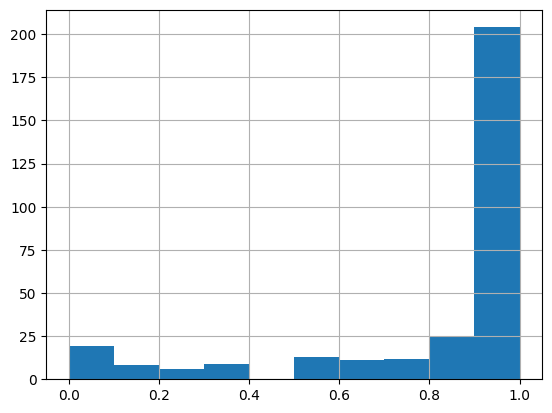

In [70]:
df[df['question_type'] == '선다형']['accuracy'].hist()

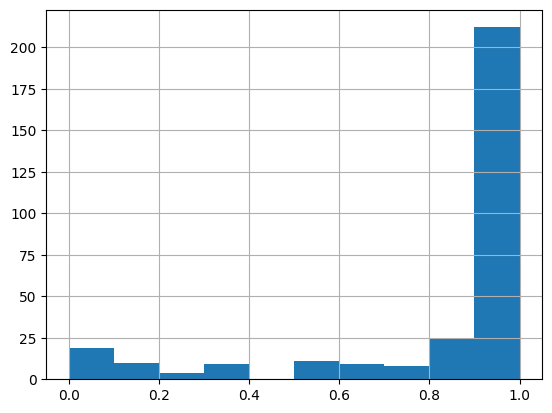

In [71]:
df[df['question_type'] == '단답형']['accuracy'].describe()

count    149.000000
mean       0.583054
std        0.425042
min        0.000000
25%        0.000000
50%        0.750000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

<Axes: >

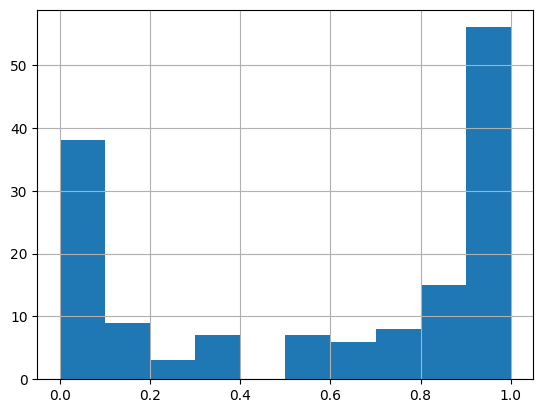

In [72]:
df[df['question_type'] == '단답형']['accuracy'].hist()

In [73]:
df['accuracy'].describe()

count    456.000000
mean       0.747807
std        0.367921
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64

In [74]:
# 정확도 쉬운 순
df = df.sort_values(by='accuracy', ascending=False)
df

,category,domain,question_type,topic_keyword,question,answer,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,accuracy
455,문화 지식,사회,선다형,캥거루족,"한국에서 경제적으로 독립하지 못한 청년이나, 부모와 함께 사는 2030 세대를 무엇...",1,455,문제 해설:\n'캥거루족'은 경제적으로 독립하지 못하고 부모의 지원 아래 생활하는 ...,문제 해설: 이 문제는 현대 사회에서 경제적 독립을 하지 못하고 부모와 동거하는 2...,문제 해설: 이 문제는 한국에서 부모와 함께 생활하며 경제적으로 자립하지 못한 20...,문제 해설: 이 문제는 한국 사회에서 경제적으로 독립하지 못하고 부모와 함께 거주하...,문제 해설: 이 문제는 한국 사회에서 경제적으로 자립하지 못하고 부모와 동거하는 2...,문제 해설:\n이 문제는 현대 한국 사회에서 경제적으로 독립하지 못하고 부모와 함께...,문제 해설:\n이 문제는 한국 사회에서 경제적으로 자립하지 못하고 부모와 함께 생활...,문제 해설: 이 문제는 한국 사회에서 경제적으로 독립하지 못하고 부모와 함께 사는 ...,1.0
452,문화 지식,역사,선다형,병인양요,흥선군의 천주교 탄압에 대한 보복으로 프랑스군이 강화도에 침입한 사건은? \n 1....,2,452,문제 해설: 이 문제는 19세기 중반 한국의 역사적 사건 중 하나를 묻고 있습니다....,"문제 해설: 이 문제는 한국 역사에서 특정 사건을 묻고 있습니다. 19세기 후반, ...",문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건입니다. 이 사건은 프...,문제 해설: 이 문제는 조선 역사에서 흥선대원군 시기의 천주교 탄압과 관련된 사건을...,문제 해설:\n병인양요는 1866년(고종 3년) 프랑스군이 흥선대원군의 천주교 탄압...,"문제 해설:\n병인양요는 1866년(고종 3년)에 발생한 사건으로, 조선에서 천주교...",문제 해설: 이 문제는 한국 역사에서 프랑스군이 강화도(인화문)에 침입한 사건에 대...,문제 해설:\n이 문제는 한국 역사에서 중요한 사건 중 하나인 '병인양요'에 관한 ...,1.0
450,문화 관점,풍습/문화유산,선다형,배냇머리자르기,일본의 오시치야처럼 한국에서 아기가 처음 태어나고 치르는 의식이나 행사로 옳은 것은...,2,450,문제 해설: 이 문제는 한국과 일본의 전통 의식 중 유사한 문화적 의미를 가진 것을...,문제 해설:\n이 문제는 한국과 일본의 전통적인 아기 출생 관련 풍습에 대해 묻고 ...,문제 해설:\n이 문제는 한국과 일본의 문화적 풍습에 대한 이해를 묻고 있습니다. ...,문제 해설: 이 문제는 한국의 전통적인 풍습 중 아기가 처음 태어나서 치르는 의식이...,문제 해설:\n이 문제는 한국과 일본의 전통적 아기 관련 의식 중 '오시치야'에 해...,문제 해설: 이 문제는 한국과 일본의 전통 풍습에 대한 비교를 묻고 있습니다. '오...,"문제 해설:\n이 문제는 한국과 일본의 전통 풍습에 관한 것으로, 특히 아기가 처음...",문제 해설: 이 문제는 한국과 일본의 전통적 아기 의식 중 유사성을 묻고 있습니다....,1.0
411,문화 실행,풍습/문화유산,선다형,망 차기놀이,한국의 망 차기 놀이를 할 때 주로 어떤 돌을 골라 망으로 쓰나요? \n 1. 모난...,3,411,"문제 해설: 한국의 망 차기 놀이는 주로 강가나 물가 주변에서 즐기는 전통 놀이로,...",문제 해설: 한국의 전통 놀이 중 하나인 '망 차기'는 주로 발로 돌을 차며 즐기는...,"문제 해설: 망 차기 놀이는 한국의 전통 민속놀이 중 하나로, 주로 어린이들이 즐기...",문제 해설: 한국의 전통 놀이 중 하나인 '망 차기'는 돌을 던져 일정한 목표를 맞...,"문제 해설: 망차기 놀이는 한국의 전통 민속 놀이 중 하나로, 주로 아이들이 겨울철...","문제 해설:\n망차기 놀이는 한국의 전통 민속놀이 중 하나로, 주로 강이나 호수 등...",문제 해설: 한국의 전통 놀이 중 하나인 '망 차기'는 주로 돌을 이용해 노는 놀이...,문제 해설: 한국의 전통 놀이 중 하나인 '망 차기 놀이'는 주로 야외에서 즐기는 ...,1.0
412,문화 지식,예술,선다형,무진기행,김승옥의 대표작으로 한 개인이 귀향과 탈향의 과정을 통해 문명화된 사회에서 개인의 ...,2,412,"문제 해설: 이 문제는 한국 문학사에서 김승옥의 대표작을 찾는 문제입니다. ""무진기...",문제 해설: 이 문제는 김승옥의 대표작을 묻고 있습니다. '무진기행'은 김승옥의 가...,"문제 해설:\n이 문제는 김승옥의 대표작 중 하나를 찾는 문제로, 주어진 선택지 중...","문제 해설:\n김승옥은 1960년대 한국 문학을 대표하는 작가 중 하나로, 그의 작...",문제 해설: 이 문제는 김승옥의 대표작 중 하나를 묻고 있습니다. '무진기행'은 김...,"문제 해설:\n김승옥의 대표작 중 하나인 ""무진기행""은 주인공이 귀향과 탈향을 통해...",문제 해설: 이 문제는 김승옥의 대표작을 묻고 있습니다. 김승옥은 한국 현대문학의 ...,문제 해설:\n김승옥의 '무진기행'은 1960년대 한국 사회의 산업화와 도시화에 대...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,문화 지식,예술,단답형,상감시법,"고려청자의 대표적인 기법 중 하나로, 그릇 표면에 무늬를 새긴 후 다른 색의 흙으로...",상감기법#상감 기법,94,"문제 해설:\n고려청자의 대표적인 기법 중 하나로, '상감시법'은 그릇의 표면에 무...",문제 해설:\n이 문제는 고려청자의 대표적인 기법 중 하나인 '상감시법'에 관한 것...,문제 해설: 이 문제는 고려청자의 대표적인 장식 기법 중 하나인 '상감시법'에 대한...,문제 해설: 이 문제는 고려청자 제작 기법에 관한 것입니다. '상감시법'은 고려청자...,문제 해설:\n이 문제는 고려청자에서 사용된 특정 기법에 관한 것입니다. 고려청자는...,문제 해설:\n이 문제는 고려청자의 대표적인 기법 중 하나인 '상감시법'에 대해 묻...,문제 해설: 이 문제는 고려청자의 특징적인 제작 기법에 대해 묻고 있습니다. 상감시...,"문제 해설:\n고려청자는 한국의 대표적인 도자기 예술로, 그 중 상감시법(象嵌施法)...",0.0
35,문화 실행,풍습/문화유산,단답형,식혜,식혜 만드는 방법을 순서에 맞게 배열하세요. 배열 시 각 기호는 '-'로 연결합니다...,ㅁ-ㄱ-ㄷ-ㄴ-ㄹ#ㅁ - ㄱ - ㄷ - ㄴ - ㄹ,35,"문제 해설: 식혜는 한국의 전통 음료로, 멥쌀을 쪄서 엿기름과 함께 발효시키는 과정...","문제 해설:\n식혜는 한국의 전통 음료로, 주로 멥쌀을 이용해 만드는 과정입니다. ...","문제 해설:\n시혜는 전통적인 한국의 음료로, 주로 멥쌀로 밥을 짓고 엿기름과 설탕...",문제 해설: 식혜를 만드는 과정을 순서대로 배열하는 문제입니다. 먼저 멥쌀을 씻어 ...,문제 해설: 이 문제는 식혜를 만드는 과정을 순서대로 배열하는 것입니다. 식혜는 전...,문제 해설: 이 문제는 식혜를 만드는 과정을 순서대로 배열하는 것입니다. 식혜는 한...,"문제 해설:\n식혜는 한국의 전통 음료로, 주로 멥쌀을 발효시켜 만드는 달콤한 음료...","문제 해설:\n식혜는 한국의 전통적인 음료로, 주로 멥쌀과 엿기름, 설탕을 이용해 ...",0.0
37,문화 실행,지리,단답형,지하철 노선,서울 지하철 신림선을 서원역에서 샛강 방향으로 탔을 때 지나가는 역을 순서대로 나열...,ㄱ-ㄹ-ㄴ-ㄷ#ㄱ - ㄹ - ㄴ - ㄷ,37,"문제 해설: 서울 지하철 신림선은 서울의 여러 지역을 연결하는 노선으로, 서원역에서...",문제 해설: 서울 지하철 신림선은 서초구에서 시작하여 관악구까지 이어지는 노선입니다...,"문제 해설: 서울 지하철 신림선을 서원역에서 샛강 방향으로 이동한다고 했을 때, 해...",문제 해설: 서울 지하철 신림선은 서원에서 샛강 방향으로 이동할 때 당곡역을 거쳐 ...,문제 해설:\n서울 지하철 신

In [77]:
df[df['accuracy'] != 1]

,category,domain,question_type,topic_keyword,question,answer,index,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,accuracy
6,문화 지식,과학기술,선다형,한국정보기술연구원,한국에서 IT 전문 인력의 양성을 담당하는 연구 기관으로는 무엇이 있나요? \n 1...,2,6,문제 해설:\n이 문제는 한국에서 IT 전문 인력 양성을 담당하는 연구 기관을 묻고...,문제 해설: 이 문제는 한국에서 IT 전문 인력 양성을 담당하는 연구 기관에 대한 ...,문제 해설: 이 문제는 한국에서 IT(정보기술) 전문 인력을 양성하는 연구 기관을 ...,문제 해설: 이 문제는 한국의 IT 전문 인력 양성을 담당하는 연구 기관에 대해 묻...,문제 해설:\n이 문제는 한국의 IT 전문 인력 양성을 담당하는 연구 기관을 묻고 ...,문제 해설:\n이 문제는 한국에서 IT 전문 인력 양성을 담당하는 연구 기관에 관한...,문제 해설: 이 문제는 한국의 과학기술 분야에서 IT 전문 인력 양성을 담당하는 연...,문제 해설: 이 문제는 한국에서 IT 전문 인력 양성을 담당하는 연구 기관에 관한 ...,0.875
15,문화 관점,가치관,선다형,민속 신앙(불길한 행동),일본에서는 젓가락을 세워서 밥에 꽂는 것을 불길하고 무례하다고 생각합니다. 한국에서...,1,15,문제 해설: 이 문제는 한국과 일본의 민속 신앙과 관련된 가치관 차이를 묻고 있습니...,"문제 해설: 이 문제는 한국과 일본의 문화적 가치관 차이를 묻고 있습니다. 특히, ...",문제 해설: 이 문제는 한국과 일본의 민속 신앙에 기반한 문화적 차이에 관한 것입니...,문제 해설:\n일본 문화에서 젓가락을 세운 채로 밥에 꽂는 행위는 고인의 영혼을 부...,문제 해설: 이 문제는 일본과 한국의 민속 신앙과 관련된 가치관 차이를 묻고 있습니...,"문제 해설:\n이 문제는 한국과 일본 문화의 가치관 차이를 묻고 있습니다. 특히, ...",문제 해설:\n일본 문화에서는 젓가락을 세운 형태로 밥에 꽂는 행동이 죽은 이를 부...,"문제 해설: 이 문제는 한국과 일본의 문화적 가치관 차이를 묻고 있습니다. 특히, ...",0.875
229,문화 관점,사회,선다형,노인장기요양보험,다음 중 한국의 '노인장기요양보험'과 유사한 제도는 무엇인가요? \n1. 미국 'S...,2,229,"문제 해설:\n노인장기요양보험은 2008년에 한국에서 시행된 제도로, 고령이나 노인...",문제 해설:\n이 문제는 한국의 노인장기요양보험과 유사한 제도를 찾는 문제입니다. ...,"문제 해설:\n노인장기요양보험은 한국의 사회보장제도 중 하나로, 고령자나 노인성 질...",문제 해설:\n노인장기요양보험은 한국에서 노인이나 장애인 등이 장기요양이 필요한 경...,문제 해설:\n'노인장기요양보험'은 한국 정부가 2008년에 도입하여 운영 중인 사...,문제 해설:\n노인장기요양보험은 고령자나 노인성 질병으로 인해 일상생활을 혼자 수행...,"문제 해설:\n노인장기요양보험은 한국에서 2008년에 도입된 제도로, 고령자나 노인...",문제 해설: 이 문제는 한국의 노인장기요양보험과 유사한 제도를 묻고 있습니다. 노인...,0.875
422,문화 관점,사회,단답형,아동수당,일본과 한국은 육아 지원 제도 중 하나로 아동수당을 지급합니다. 한국은 일반적으로 ...,"10만 원#10만원#100,000원#십만원#십 만원",422,"문제 해설: 이 문제는 한국과 일본의 육아 지원 제도에 관한 것으로, 특히 한국의 ...","문제 해설:\n한국에서 아동수당은 출산과 육아를 지원하기 위한 제도로, 만 8세 미...",문제 해설:\n한국의 아동수당은 저출산 문제를 해결하기 위한 육아 지원 정책 중 하...,"문제 해설: 이 문제는 한국과 일본의 육아 지원 제도, 특히 아동수당 지급 기준에 ...",문제 해설: 이 문제는 한국과 일본의 육아 지원 제도 중 아동수당 지급 금액에 대해...,문제 해설:\n이 문제는 한국과 일본의 육아 지원 제도 중 하나인 아동수당에 관한 ...,"문제 해설:\n아동수당은 국가와 지방자치단체가 아동의 양육을 지원하고, 가정의 경제...","문제 해설:\n아동수당은 국가의 육아 지원 제도 중 하나로, 자녀가 있는 가정에 경...",0.875
287,문화 지식,정치/경제,단답형,IMF 외환위기,1990년대 한국의 외환 위기가 일어난 당시의 정부를 일컫는 말로 민간인 출신에 의...,문민정부#문민 정부,287,문제 해설: 1990년대 한국의 외환위기는 1997년에 발생한 경제적 위기입니다. ...,"문제 해설:\nIMF 외환위기는 1997년에 발생했으며, 당시 한국 정부는 '문민정...",문제 해설: 이 문제는 1990년대 한국의 IMF 외환위기와 관련된 특정 정부 형태...,문제 해설:\n1997년 한국의 외환 위기는 당시 김대중 정부가 집권한 시기였습니다...,"문제 해설: 이 문제는 1990년대 한국의 IMF 외환위기가 발생했을 때, 그 당시...","문제 해설: 1990년대 한국의 외환 위기는 1997년에 발생한 경제적 사태로, 이...",문제 해설: 이 문제는 1990년대 한국의 외환위기와 관련된 정치 용어에 대해 묻고...,"문제 해설: 이 문제는 1990년대 한국의 외환 위기 당시, 민간인 출신에 의해 구...",0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,문화 지식,예술,단답형,상감시법,"고려청자의 대표적인 기법 중 하나로, 그릇 표면에 무늬를 새긴 후 다른 색의 흙으로...",상감기법#상감 기법,94,"문제 해설:\n고려청자의 대표적인 기법 중 하나로, '상감시법'은 그릇의 표면에 무...",문제 해설:\n이 문제는 고려청자의 대표적인 기법 중 하나인 '상감시법'에 관한 것...,문제 해설: 이 문제는 고려청자의 대표적인 장식 기법 중 하나인 '상감시법'에 대한...,문제 해설: 이 문제는 고려청자 제작 기법에 관한 것입니다. '상감시법'은 고려청자...,문제 해설:\n이 문제는 고려청자에서 사용된 특정 기법에 관한 것입니다. 고려청자는...,문제 해설:\n이 문제는 고려청자의 대표적인 기법 중 하나인 '상감시법'에 대해 묻...,문제 해설: 이 문제는 고려청자의 특징적인 제작 기법에 대해 묻고 있습니다. 상감시...,"문제 해설:\n고려청자는 한국의 대표적인 도자기 예술로, 그 중 상감시법(象嵌施法)...",0.000
35,문화 실행,풍습/문화유산,단답형,식혜,식혜 만드는 방법을 순서에 맞게 배열하세요. 배열 시 각 기호는 '-'로 연결합니다...,ㅁ-ㄱ-ㄷ-ㄴ-ㄹ#ㅁ - ㄱ - ㄷ - ㄴ - ㄹ,35,"문제 해설: 식혜는 한국의 전통 음료로, 멥쌀을 쪄서 엿기름과 함께 발효시키는 과정...","문제 해설:\n식혜는 한국의 전통 음료로, 주로 멥쌀을 이용해 만드는 과정입니다. ...","문제 해설:\n시혜는 전통적인 한국의 음료로, 주로 멥쌀로 밥을 짓고 엿기름과 설탕...",문제 해설: 식혜를 만드는 과정을 순서대로 배열하는 문제입니다. 먼저 멥쌀을 씻어 ...,문제 해설: 이 문제는 식혜를 만드는 과정을 순서대로 배열하는 것입니다. 식혜는 전...,문제 해설: 이 문제는 식혜를 만드는 과정을 순서대로 배열하는 것입니다. 식혜는 한...,"문제 해설:\n식혜는 한국의 전통 음료로, 주로 멥쌀을 발효시켜 만드는 달콤한 음료...","문제 해설:\n식혜는 한국의 전통적인 음료로, 주로 멥쌀과 엿기름, 설탕을 이용해 ...",0.000
37,문화 실행,지리,단답형,지하철 노선,서울 지하철 신림선을 서원역에서 샛강 방향으로 탔을 때 지나가는 역을 순서대로 나열...,ㄱ-ㄹ-ㄴ-ㄷ#ㄱ - ㄹ - ㄴ - ㄷ,37,"문제 해설: 서울 지하철 신림선은 서울의 여러 지역을 연결하는 노선으로, 서원역에서...",문제 해설: 서울 지하철 신림선은 서초구에서 시작하여 관악구까지 이어지는 노선입니다...,"문제 해설: 서울 지하철 신림선을 서원역에서 샛강 방향으로 이동한다고 했을 때, 해...",문제 해

<Axes: >

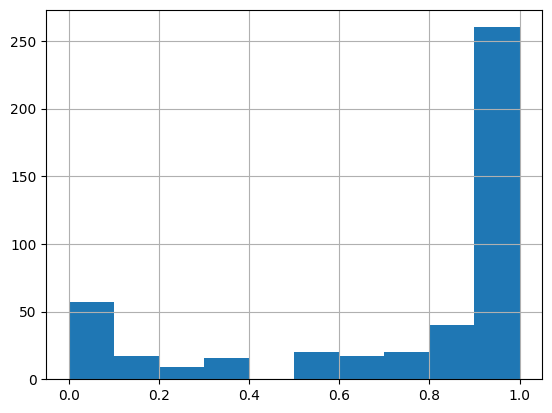

In [75]:
df['accuracy'].hist()

In [76]:
curri_df = df[(df['accuracy'] != 0) & (df['accuracy'] != 1)]
curri_df_v2 = df[(df['accuracy'] != 1)]
curri_df_v2.to_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형_skt_curriculum_v2.csv', index=False)
curri_df.to_csv('/workspace/korean_culture_QA_2025/data/preprocessed/grpo_train_excluded_서술형_skt_curriculum_v1.csv', index=False)